In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 产生模拟数据

In [2]:
from sklearn.datasets import make_blobs  # 导入产生模拟数据的方法
# 生成模拟数据
k = 5 # 给定聚类数量
X, Y = make_blobs(n_samples=1000, n_features=2, centers=k, random_state=1)

# 采用sklearn 内置的kmeans算法来进行聚类

用sklearn内置的K-Means算法聚类耗时： 0.02692699432373047


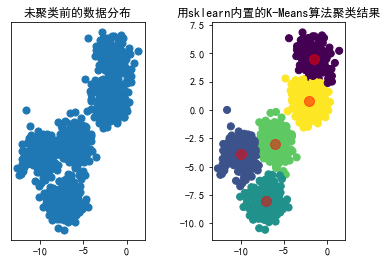

In [3]:
from  sklearn.cluster import KMeans

# 构建模型
s=time.time()
# init默认是'k-means++':用一种特殊的方法选定初始簇中心，可加速迭代过程的收敛
km = KMeans(n_clusters=k, init='k-means++', max_iter=30) 
km.fit(X)
print("用sklearn内置的K-Means算法聚类耗时：",time.time()-s)

centroids = km.cluster_centers_  # 获取簇心
# 获取聚类后的样本所属簇对应值
y_kmeans = km.predict(X)
# 画图
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.yticks(())
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
# 聚类后的数据
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.title("用sklearn内置的K-Means算法聚类结果")
plt.show()

# 用算法原理编写K-Means算法

In [4]:
def distEclud(vecA,vecB):
    """
    计算两个向量的欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

def randCent(dataSet,k):
    """
    随机生成k个点作为质心，其中质心均在整个数据数据的边界之内
    """
    n=dataSet.shape[1] # 获取数据的维度
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ+rangeJ*np.random.rand(k,1)
    return centroids

def kMeans(dataSet,k,distMeas=distEclud, createCent=randCent):
    """
    k-Means聚类算法,返回最终的k各质心和点的分配结果
    """
    m = dataSet.shape[0]  #获取样本数量
    # 构建一个簇分配结果矩阵，共两列，第一列为样本所属的簇类值，第二列为样本到簇质心的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    # 1. 初始化k个质心
    centroids = createCent(dataSet,k) 
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            # 2. 找出最近的质心
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 3. 更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids) # 打印簇中心
        # 4. 更新质心
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] # 获取给定簇的所有点
            centroids[cent,:] = np.mean(ptsClust,axis=0) # 沿矩阵列的方向求均值
    return centroids,clusterAssment

[[-8.79356187  1.58556699]
 [-7.48360094 -1.09699745]
 [-8.2486364  -7.00369298]
 [ 0.99839366  6.7035885 ]
 [-7.03366588 -6.20657651]]
[[-5.60739736  2.03625537]
 [-5.63673227 -1.49745892]
 [-8.71216756 -6.82631816]
 [-1.44330742  3.78129564]
 [-6.51738867 -5.76279117]]
[[-3.32112708  1.22481289]
 [-5.65724063 -2.10876921]
 [-9.05020388 -5.9488208 ]
 [-1.5390359   3.20475138]
 [-6.43670197 -6.01329695]]
[[-2.43108534  0.52615724]
 [-6.16890133 -2.69652594]
 [-9.72124026 -4.72552518]
 [-1.44232108  3.94349789]
 [-6.58323988 -7.52514547]]
[[-2.14314447  0.6175235 ]
 [-6.0957017  -2.94952427]
 [-9.9883745  -3.96598696]
 [-1.55397563  4.34315254]
 [-6.9941673  -8.05209024]]
[[-2.11471369  0.69628625]
 [-6.05545461 -2.99288183]
 [-9.98028373 -3.90557712]
 [-1.5551536   4.43179608]
 [-7.05942132 -8.07760549]]
[[-2.09867441  0.73136586]
 [-6.05545461 -2.99288183]
 [-9.98028373 -3.90557712]
 [-1.55989776  4.47140403]
 [-7.05942132 -8.07760549]]
[[-2.09250914  0.7492618 ]
 [-6.05545461 -2.9928

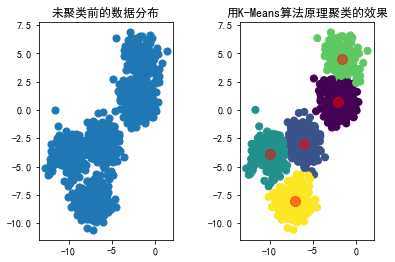

In [6]:
s=time.time()
myCentroids,clustAssing=kMeans(X,k) # myCentroids为簇心
print("用K-Means算法原理聚类耗时：",time.time()-s)
centroids=myCentroids.A # 将matrix转换为ndarray类型
# 获取聚类后的样本所属的簇值，将matrix转换为ndarray
y_kmeans=clustAssing[:,0].A[:,0]
# 画图
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
# 聚类后的数据
plt.subplot(122)
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.title("用K-Means算法原理聚类的效果")
plt.show()
